In [1]:
import pandas as pd

# genome_socres = pd.read_csv('data/genome-scores.csv')
# genome_tags = pd.read_csv('data/genome-tags.csv')
# links = pd.read_csv('data/links.csv')
# movies = pd.read_csv('data/movies.csv')
# ratings = pd.read_csv('data/ratings.csv')
# tags = pd.read_csv('data/tags.csv')


In [2]:
ratings = pd.read_csv('data/ratings.csv')
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# 提取日期
ratings['date'] = ratings['timestamp'].dt.date
ratings['month'] = ratings['timestamp'].dt.month
ratings['weekday'] = ratings['timestamp'].dt.weekday
ratings['hour'] = ratings['timestamp'].dt.hour

ratings.head()

,userId,movieId,rating,timestamp,date,month,weekday,hour
0,1,296,5.0,2006-05-17 15:34:04,2006-05-17,5,2,15
1,1,306,3.5,2006-05-17 12:26:57,2006-05-17,5,2,12
2,1,307,5.0,2006-05-17 12:27:08,2006-05-17,5,2,12
3,1,665,5.0,2006-05-17 15:13:40,2006-05-17,5,2,15
4,1,899,3.5,2006-05-17 12:21:50,2006-05-17,5,2,12


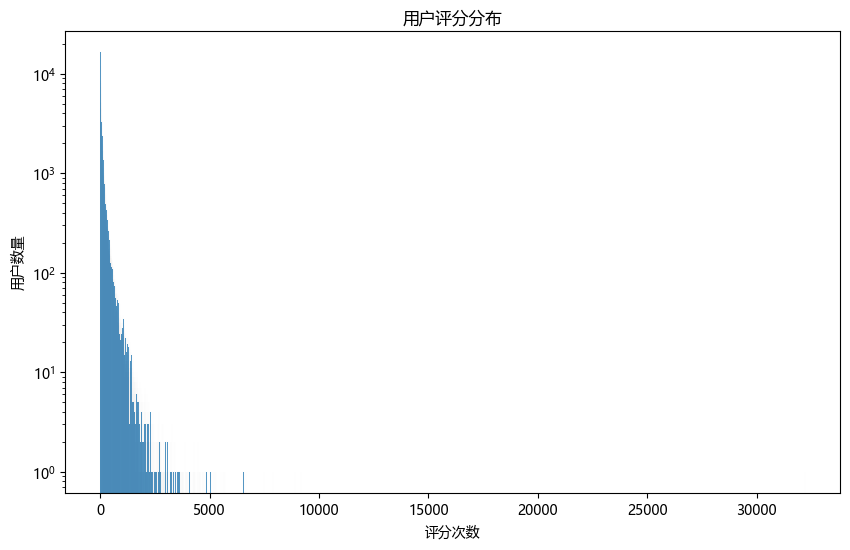

用户评分次数的分位数：
 0.10      24
0.50      71
0.90     353
0.95     554
0.99    1228
Name: rating_count, dtype: int32


In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# 统计各个用户的评价次数
user_activity = ratings.groupby('userId')['rating'].count().reset_index()
user_activity.columns = ['user_id', 'rating_count']

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(10, 6))
sns.histplot(user_activity['rating_count'])
plt.title('用户评分分布')
plt.xlabel('评分次数')
plt.ylabel('用户数量')
plt.yscale('log')
plt.show()

quantiles = user_activity['rating_count'].quantile([0.1, 0.5, 0.9, 0.95, 0.99]).astype(int)
print("用户评分次数的分位数：\n", quantiles)

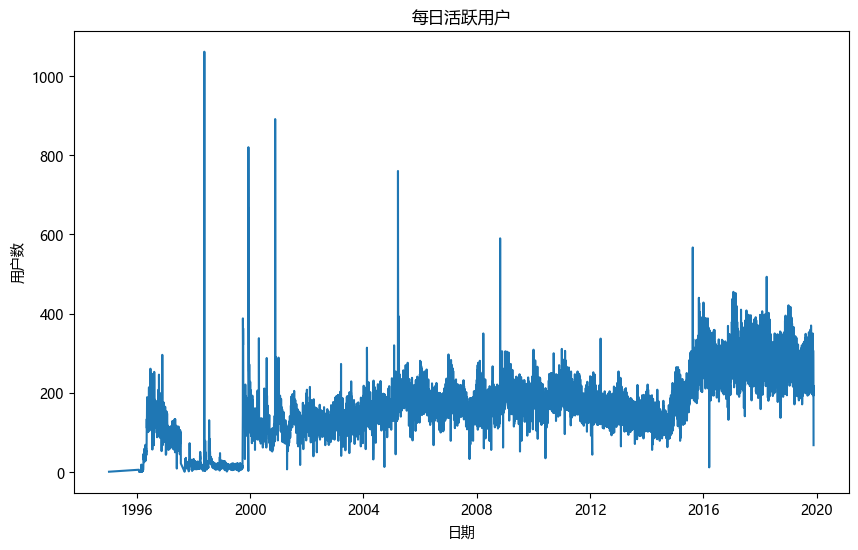

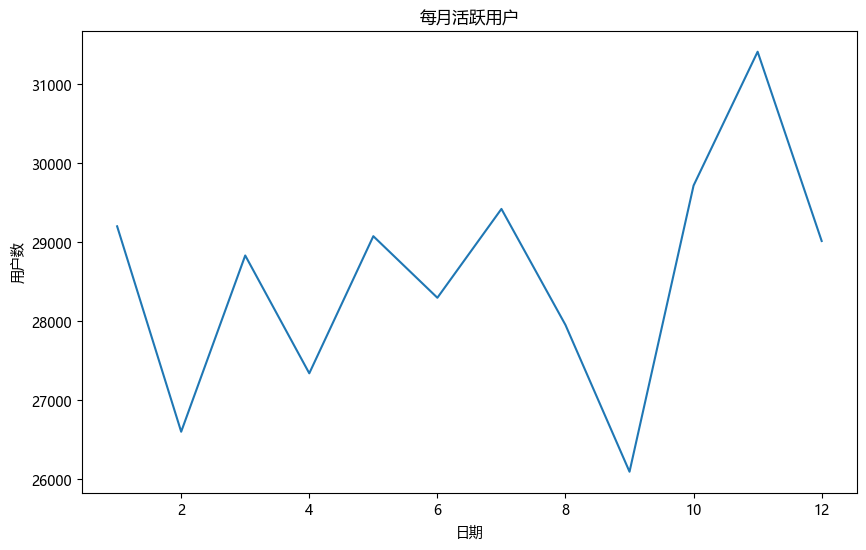

In [7]:
# 统计用户日活跃和月活跃
daily_active_users = ratings.groupby('date')['userId'].nunique()
monthly_active_users = ratings.groupby('month')['userId'].nunique()

plt.figure(figsize=(10, 6))
daily_active_users.plot(title='每日活跃用户', xlabel='日期', ylabel='用户数')
plt.show()

plt.figure(figsize=(10, 6))
monthly_active_users.plot(title='每月活跃用户', xlabel='日期', ylabel='用户数')
plt.show()

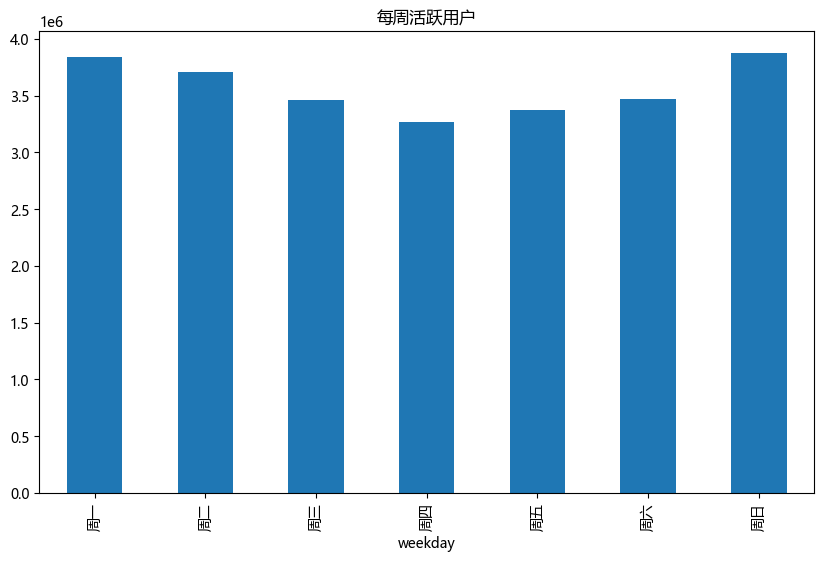

In [ ]:
# 统计每周的活跃用户
plt.figure(figsize=(10, 6))
ratings['weekday'].value_counts().sort_index().plot(kind='bar')
plt.title('每周活跃用户')
plt.xticks(ticks=range(7), labels=['周一', '周二', '周三', '周四', '周五', '周六', '周日'])
plt.show()

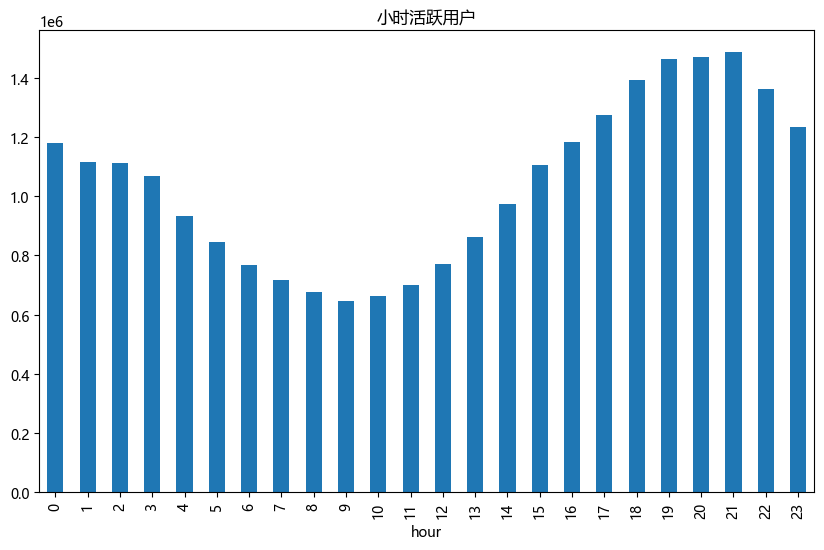

In [ ]:
# 统计一天内各个小时的活跃用户
plt.figure(figsize=(10, 6))
ratings['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('小时活跃用户')
plt.show()